In [3]:
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import plotnine
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.feature_selection import VarianceThreshold
import math
from statsmodels.tsa.stattools import adfuller 
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed,Input, Dropout,Bidirectional
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#VAR
from statsmodels.tsa.stattools import adfuller 
import statsmodels.tsa.api as smt

#IF
from sklearn.ensemble import IsolationForest

#Evaluation
from sklearn.metrics import precision_recall_curve,f1_score,accuracy_score,recall_score,precision_score as precision_score_f


# Data Loading and Exploration

In [4]:
#Training dataset 
df = pd.read_csv('SWaT_Dataset_Normal_v0.csv')
print("Data size normal data:", df.shape) # print data size

Data size normal data: (496800, 53)


In [5]:
#Test dataset
df_test = pd.read_excel('SWaT_Dataset_Attack_v0.xlsx', engine='openpyxl',header=1)
print("Data test size:", df_test.shape) # print data size

Data test size: (449919, 53)


In [4]:
#Converting Timestamp to DateTime Format
df_test[' Timestamp'] = pd.to_datetime(df_test[' Timestamp'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [9]:
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2,2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
3,2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
4,2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


In [8]:
df_test.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


# Data Preprocessing

In [6]:
df.duplicated().sum() # check the duplicates

0

In [10]:
df.isnull().sum()/len(df)*100

Timestamp    0.0
FIT101       0.0
LIT101       0.0
MV101        0.0
P101         0.0
AIT201       0.0
AIT202       0.0
AIT203       0.0
FIT201       0.0
MV201        0.0
P203         0.0
P205         0.0
DPIT301      0.0
FIT301       0.0
LIT301       0.0
MV301        0.0
MV302        0.0
MV303        0.0
MV304        0.0
P301         0.0
P302         0.0
AIT401       0.0
AIT402       0.0
FIT401       0.0
LIT401       0.0
P402         0.0
UV401        0.0
AIT501       0.0
AIT502       0.0
AIT503       0.0
AIT504       0.0
FIT501       0.0
FIT502       0.0
FIT503       0.0
FIT504       0.0
P501         0.0
PIT501       0.0
PIT502       0.0
PIT503       0.0
FIT601       0.0
P602         0.0
dtype: float64

In [11]:
df['Normal/Attack'].unique()

array(['Normal'], dtype=object)

In [13]:
df_test['Normal/Attack'] = df_test['Normal/Attack'].replace('A ttack', 'Attack')

In [14]:
attack_labels = df_test.pop('Normal/Attack').values

In [15]:
#number of attackes in the test set
unique_elements, counts = np.unique(attack_labels, return_counts=True)
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

Attack: 54621
Normal: 395298


Data Scaling/Normalization

In [17]:
Date_column = df['Timestamp'] #make a copy of Date column to use later
df_copy = df
df = df.drop('Timestamp', axis=1)
df = df.drop('Normal/Attack', axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
df_lstm = pd.DataFrame(x_scaled, index=df.index, columns=df.columns)

In [23]:
df_lstm.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.899895,0.160292,1.0,1.0,0.0,0.000000,0.0,0.01971,0.993304,1.0,...,0.0,0.0,0.0,0.004448,0.0,0.005921,0.000147,0.0,0.0,0.0
1,0.895111,0.159845,1.0,1.0,0.0,0.000000,0.0,0.01971,0.992222,1.0,...,0.0,0.0,0.0,0.004448,0.0,0.005921,0.000147,0.0,0.0,0.0
2,0.888694,0.159533,1.0,1.0,0.0,0.000000,0.0,0.01971,0.991707,1.0,...,0.0,0.0,0.0,0.004448,0.0,0.005921,0.000147,0.0,0.0,0.0
3,0.884611,0.158819,1.0,1.0,0.0,0.000000,0.0,0.01971,0.991398,1.0,...,0.0,0.0,0.0,0.004448,0.0,0.005921,0.000147,0.0,0.0,0.0
4,0.883327,0.158372,1.0,1.0,0.0,0.003408,0.0,0.01971,0.991398,1.0,...,0.0,0.0,0.0,0.004448,0.0,0.005921,0.000147,0.0,0.0,0.0


In [19]:
Date_column_test = df_test[' Timestamp'] #make a copy of Date column to use later
df_testcopy = df_test
df_test = df_test.drop(' Timestamp', axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_test = min_max_scaler.fit_transform(df_test)
df_lstm_test = pd.DataFrame(x_scaled_test, index=df_test.index, columns=df_test.columns)

In [24]:
df_lstm_test.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.879322,0.452962,1.0,1.0,0.0,0.942783,0.876785,0.436773,0.865044,1.0,...,0.987464,1.0,0.0,0.985802,0.837398,0.987359,0.000071,0.0,0.0,0.0
1,0.886285,0.453015,1.0,1.0,0.0,0.942783,0.876785,0.436773,0.865044,1.0,...,0.987464,1.0,0.0,0.985802,0.837398,0.987783,0.000071,0.0,0.0,0.0
2,0.901833,0.452962,1.0,1.0,0.0,0.942783,0.876081,0.436773,0.863956,1.0,...,0.990135,1.0,0.0,0.985868,0.837398,0.987783,0.000071,0.0,0.0,0.0
3,0.918195,0.453122,1.0,1.0,0.0,0.942783,0.876081,0.436773,0.863956,1.0,...,0.990135,1.0,0.0,0.985868,0.837398,0.987444,0.000071,0.0,0.0,0.0
4,0.930842,0.453816,1.0,1.0,0.0,0.942783,0.876081,0.436773,0.864228,1.0,...,0.990135,1.0,0.0,0.985868,0.837398,0.986850,0.000071,0.0,0.0,0.0


# LSTM AE (training and testing)

In [31]:
# LSTM autoencoder parameters
timesteps = 20
input_dim = df_lstm.shape[1]

In [34]:
#Creating Timestep-based Dataset
def create_dataset(data, timesteps):
    X = []
    for i in range(len(data) - timesteps):
        X.append(data.iloc[i:i + timesteps].values)
    return np.array(X)


In [35]:
# Prepare the dataset for LSTM autoencoder
X = create_dataset(df_lstm, timesteps)

In [36]:
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = Bidirectional(LSTM(64, activation='relu', return_sequences=True))(inputs)
    D1 = Dropout(0.2)(L1)
    L2 = Bidirectional(LSTM(16, activation='relu', return_sequences=False))(D1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = Bidirectional(LSTM(16, activation='relu', return_sequences=True))(L3)
    D2 = Dropout(0.2)(L4)
    L5 = Bidirectional(LSTM(64, activation='relu', return_sequences=True))(D2)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model


In [41]:
autoencoder = autoencoder_model(X)
optimizer = Adam(learning_rate=2e-4)
autoencoder.compile(optimizer=optimizer, loss='mse')

In [42]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

In [43]:
#training
nb_epochs = 30
batch_size = 40
history = autoencoder.fit(X, X, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.2, callbacks=[early_stopping]).history

Epoch 1/30
9936/9936 [==============================] - 506s 50ms/step - loss: 0.0053 - val_loss: 9.8036e-04
Epoch 2/30
9936/9936 [==============================] - 495s 50ms/step - loss: 8.4751e-04 - val_loss: 6.7100e-04
Epoch 3/30
9936/9936 [==============================] - 499s 50ms/step - loss: 6.1461e-04 - val_loss: 5.4172e-04
Epoch 4/30
9936/9936 [==============================] - 488s 49ms/step - loss: 5.0000e-04 - val_loss: 4.6545e-04
Epoch 5/30
9936/9936 [==============================] - 504s 51ms/step - loss: 4.2970e-04 - val_loss: 4.2724e-04
Epoch 6/30
9936/9936 [==============================] - 515s 52ms/step - loss: 3.7974e-04 - val_loss: 6.3846e-04
Epoch 7/30
9936/9936 [==============================] - 516s 52ms/step - loss: 3.4472e-04 - val_loss: 3.5329e-04
Epoch 8/30
9936/9936 [==============================] - 504s 51ms/step - loss: 3.1825e-04 - val_loss: 3.2400e-04
Epoch 9/30
9936/9936 [==============================] - 503s 51ms/step - loss: 2.9527e-04 - val_loss

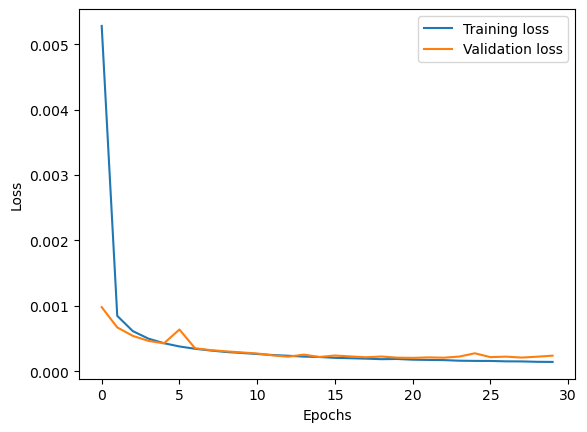

In [44]:
#Training and Validation Loss
plt.plot(history['loss'], label='Training loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
# Prepare the test dataset for LSTM autoencoder
X_test = create_dataset(df_lstm_test, timesteps)

In [47]:
reconstructed_data = autoencoder.predict(X)

15525/15525 [==============================] - 288s 19ms/step


In [46]:
reconstructed_data_test = autoencoder.predict(X_test)

14060/14060 [==============================] - 216s 15ms/step


In [48]:
print("Shape of X: ", X.shape)
print("Shape of reconstructed_data: ", reconstructed_data.shape)

Shape of X:  (496780, 20, 51)
Shape of reconstructed_data:  (496780, 20, 51)


In [49]:
print("Shape of X: ", X_test.shape)

Shape of X:  (449899, 20, 51)


Trying the LSTM AE separately for anomaly detection

(0.0, 0.5)

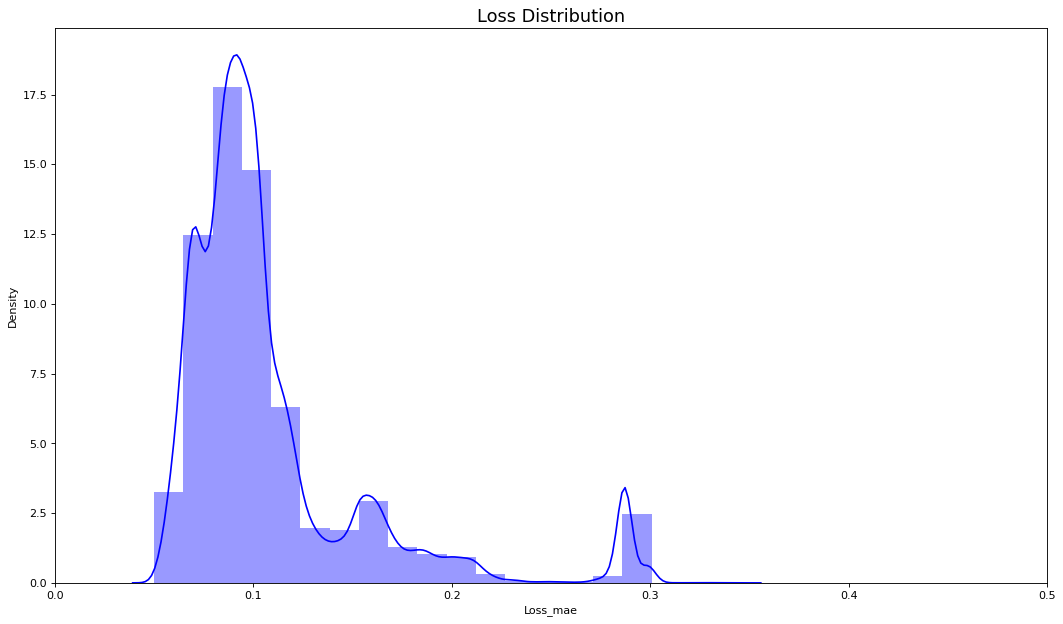

In [50]:
# Calculate the mean absolute error (MAE) between the original and reconstructed data
mae_loss_per_timestep = np.mean(np.abs(X_test - reconstructed_data_test), axis=2)
mae_loss = np.mean(mae_loss_per_timestep, axis=1)

# Convert the MAE loss to a DataFrame
mae_loss_df = pd.DataFrame(mae_loss, columns=['Loss_mae'])
mae_loss_df.index = df_lstm_test.index[:mae_loss_df.shape[0]]

# Plot the loss distribution
plt.figure(figsize=(16, 9), dpi=80)
plt.title("Loss Distribution", fontsize=16)
sns.distplot(mae_loss_df['Loss_mae'], bins=20, kde=True, color='blue')
plt.xlim([0.0, 0.5])


In [51]:
mean_mae = mae_loss_df['Loss_mae'].mean()
std_mae = mae_loss_df['Loss_mae'].std()
threshold = mean_mae + 3 * std_mae
threshold

0.2548043051585688

Number of anomalies found:  26071


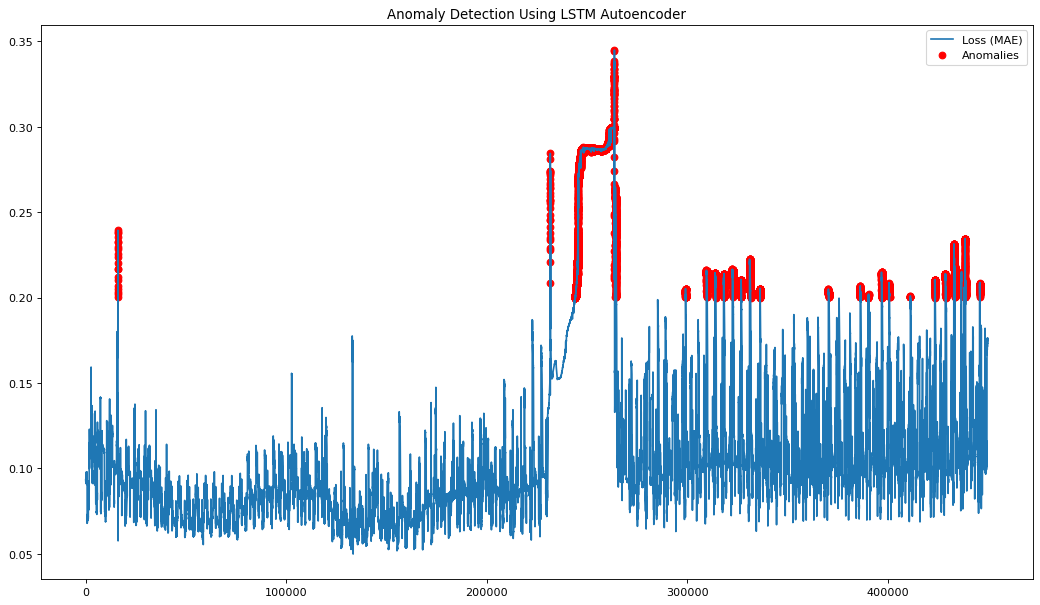

In [56]:
# Set a threshold for anomalies
threshold = 0.2

# Identify data points with an MAE higher than the threshold as anomalies
anomalies = mae_loss_df[mae_loss_df['Loss_mae'] > threshold]
print("Number of anomalies found: ", len(anomalies))

# Visualize the anomalies on a plot
plt.figure(figsize=(16, 9), dpi=80)
plt.plot(df.index[:mae_loss_df.shape[0]], mae_loss_df['Loss_mae'], label="Loss (MAE)")
plt.scatter(anomalies.index, anomalies['Loss_mae'], color='red', label="Anomalies")
plt.title("Anomaly Detection Using LSTM Autoencoder")
plt.legend()
plt.show()

In [57]:
# Add a new column 'lstm_anomalies' with all 1s
mae_loss_df['lstm_anomalies'] = 1

# Find the indices of the detected anomalies
anomaly_indices = mae_loss_df[mae_loss_df['Loss_mae'] > threshold].index

# Set the 'lstm_anomalies' values to -1 for the detected anomalies
mae_loss_df.loc[anomaly_indices, 'lstm_anomalies'] = -1


In [58]:
mae_loss_df

,Loss_mae,lstm_anomalies
0,0.093235,1
1,0.093101,1
2,0.092939,1
3,0.092769,1
4,0.092611,1
...,...,...
449894,0.174825,1
449895,0.175059,1
449896,0.175275,1
449897,0.175510,1


In [59]:
mae_loss_df.iloc[20:]['lstm_anomalies'].values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
# Calculate the residuals for training
residuals = np.abs(X - reconstructed_data)

In [61]:
# Calculate the residuals for testing
residuals_test = np.abs(X_test - reconstructed_data_test)

In [62]:
# Calculate the mean residual for each feature in each window
mean_residuals = np.mean(residuals, axis=1)

In [63]:
# Calculate the mean residual for each feature in each window
mean_residuals_test = np.mean(residuals_test, axis=1)

In [64]:
# Create a DataFrame from the aggregated residuals
mean_residuals_df = pd.DataFrame(mean_residuals, columns=df.columns)

In [65]:
# Create a DataFrame from the aggregated residuals
mean_residuals_df_test = pd.DataFrame(mean_residuals_test, columns=df.columns)

In [1099]:
mean_residuals_df

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.030551,0.020027,0.017481,0.012821,0.000819,0.065892,0.032965,0.036818,0.019952,0.010531,...,0.011029,0.011459,0.000417,0.018438,0.029819,0.021649,0.005939,0.001163,0.006935,0.001379
1,0.030855,0.019867,0.017486,0.012789,0.000819,0.064295,0.032984,0.036893,0.019925,0.010490,...,0.011039,0.011474,0.000417,0.018435,0.029854,0.021648,0.005983,0.001162,0.006933,0.001378
2,0.030969,0.019667,0.017492,0.012718,0.000819,0.062618,0.032968,0.036919,0.019918,0.010462,...,0.011051,0.011493,0.000417,0.018435,0.029881,0.021651,0.006023,0.001162,0.006931,0.001378
3,0.030999,0.019482,0.017493,0.012639,0.000819,0.060982,0.032951,0.036938,0.019943,0.010421,...,0.011068,0.011514,0.000417,0.018430,0.029897,0.021650,0.006067,0.001162,0.006930,0.001378
4,0.030677,0.019332,0.017494,0.012552,0.000819,0.059352,0.032912,0.036949,0.020014,0.010378,...,0.011088,0.011535,0.000417,0.018430,0.029890,0.021654,0.006113,0.001163,0.006930,0.001378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496775,0.022973,0.004757,0.001922,0.002676,0.000068,0.010583,0.057636,0.009033,0.003207,0.002973,...,0.011687,0.003625,0.000051,0.019221,0.089252,0.020357,0.001724,0.000183,0.001143,0.000051
496776,0.020606,0.004636,0.002099,0.002761,0.000067,0.010263,0.057867,0.008778,0.003068,0.003138,...,0.012218,0.003795,0.000051,0.019228,0.090115,0.020450,0.001715,0.000184,0.001057,0.000052
496777,0.017872,0.004525,0.002251,0.002838,0.000066,0.009960,0.058239,0.008432,0.003105,0.003260,...,0.012668,0.003904,0.000051,0.019242,0.090868,0.020467,0.001605,0.000184,0.001004,0.000053
496778,0.015448,0.004462,0.002353,0.002908,0.000066,0.009608,0.058754,0.008132,0.003253,0.003353,...,0.013079,0.003971,0.000051,0.019270,0.091388,0.020506,0.001482,0.000184,0.000982,0.000053


In [67]:
mean_residuals_df_test

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.046101,0.036277,0.007834,0.026952,0.000229,0.364251,0.335272,0.071175,0.125692,0.010803,...,0.013755,0.007711,0.000138,0.033250,0.401853,0.031328,0.025845,0.000103,0.019505,0.000098
1,0.040978,0.036306,0.007847,0.027197,0.000229,0.363951,0.334453,0.070824,0.125858,0.010800,...,0.013643,0.007655,0.000138,0.033315,0.402270,0.031415,0.025845,0.000103,0.019557,0.000099
2,0.035441,0.036253,0.007861,0.027426,0.000229,0.363582,0.333571,0.070410,0.126032,0.010789,...,0.013683,0.007593,0.000138,0.033394,0.402720,0.031496,0.025843,0.000103,0.019596,0.000099
3,0.029867,0.036065,0.007880,0.027562,0.000229,0.363215,0.332984,0.070023,0.126135,0.010770,...,0.013542,0.007537,0.000137,0.033496,0.403057,0.031607,0.025840,0.000104,0.019611,0.000099
4,0.024368,0.035901,0.007905,0.027630,0.000229,0.362902,0.332520,0.069848,0.126233,0.010750,...,0.013187,0.007488,0.000137,0.033609,0.403246,0.031745,0.025849,0.000104,0.019612,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449894,0.043498,0.086260,0.034373,0.055882,0.000065,0.374818,0.889693,0.390783,0.089051,0.077066,...,0.073163,0.043359,0.000056,0.075061,0.115577,0.074605,0.069140,0.000239,0.095020,0.000142
449895,0.043343,0.084455,0.034654,0.056138,0.000065,0.375589,0.889660,0.390880,0.088707,0.077627,...,0.073206,0.043712,0.000056,0.075356,0.116940,0.074891,0.069247,0.000241,0.095451,0.000143
449896,0.047178,0.083229,0.035086,0.056565,0.000065,0.376304,0.889414,0.390857,0.088018,0.078362,...,0.073293,0.044088,0.000057,0.075791,0.118450,0.075340,0.069438,0.000241,0.095751,0.000143
449897,0.053508,0.081361,0.035405,0.056896,0.000065,0.376778,0.889239,0.390980,0.087533,0.078993,...,0.073356,0.044468,0.000057,0.076087,0.119889,0.075682,0.069666,0.000242,0.096022,0.000144


In [30]:
dfg=df.copy()

In [68]:
original_df = df_test.iloc[20:]

In [69]:
original_df

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
20,2.489191,522.7290,2,2,1,262.0161,8.390669,328.3773,2.439881,2,...,0.308362,2,1,251.1856,1.649953,189.8872,0.000128,1,1,1
21,2.473497,522.5327,2,2,1,262.0161,8.390669,328.6337,2.439881,2,...,0.308362,2,1,251.1856,1.649953,189.8872,0.000128,1,1,1
22,2.458764,522.8860,2,2,1,262.0161,8.390669,328.6337,2.439881,2,...,0.307978,2,1,251.1856,1.649953,189.8872,0.000128,1,1,1
23,2.444031,523.4355,2,2,1,262.0161,8.390669,328.6337,2.439881,2,...,0.306569,2,1,251.1856,1.649953,189.8872,0.000128,1,1,1
24,2.434744,523.6710,2,2,1,262.0161,8.390669,328.6337,2.439881,2,...,0.306569,2,1,251.1856,1.649953,189.8872,0.000128,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,0.306569,2,1,251.1535,0.865024,189.0220,0.000000,1,1,1
449915,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,0.306569,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1
449916,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,0.306569,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1
449917,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,0.307978,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1


# VAR

In [71]:
residuals2 = mean_residuals_df.values

In [33]:
#Testing the stationary of data
def test_stationarity(data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(data, autolag='AIC')
    else:
        adf_test = adfuller(data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

In [101]:
adf_test_results = {
    col: test_stationarity(mean_residuals_df, col)
    for col in mean_residuals_df.columns
}
adf_test_results

{'FIT101': 'Stationary',
 'LIT101': 'Stationary',
 ' MV101': 'Stationary',
 'P101': 'Stationary',
 'P102': 'Stationary',
 ' AIT201': 'Stationary',
 'AIT202': 'Stationary',
 'AIT203': 'Stationary',
 'FIT201': 'Stationary',
 ' MV201': 'Stationary',
 ' P201': 'Stationary',
 'P203': 'Stationary',
 ' P204': 'Stationary',
 'P205': 'Stationary',
 'P206': 'Stationary',
 'DPIT301': 'Stationary',
 'FIT301': 'Stationary',
 'LIT301': 'Stationary',
 'MV301': 'Stationary',
 'MV302': 'Stationary',
 ' MV303': 'Stationary',
 'MV304': 'Stationary',
 'P302': 'Stationary',
 'AIT401': 'Stationary',
 'AIT402': 'Stationary',
 'FIT401': 'Stationary',
 'LIT401': 'Stationary',
 'P402': 'Stationary',
 'P403': 'Stationary',
 'UV401': 'Stationary',
 'AIT501': 'Stationary',
 'AIT502': 'Stationary',
 'AIT503': 'Stationary',
 'AIT504': 'Stationary',
 'FIT501': 'Stationary',
 'FIT502': 'Stationary',
 'FIT503': 'Stationary',
 'FIT504': 'Stationary',
 'P501': 'Stationary',
 'PIT501': 'Stationary',
 'PIT502': 'Stationary

In [852]:
# Determine the optimal lag order for the VAR model
max_lag_order = 20
model = smt.VAR(residuals2)
lag_order_results = model.select_order(max_lag_order)
optimal_lag_order = lag_order_results.aic  # Use '.bic' for BIC

In [853]:
optimal_lag_order

20

In [854]:
# Fit the VAR model with the optimal lag order
var_model = model.fit(optimal_lag_order)

In [855]:
# the VAR model's fitted values
var_fitted_values = var_model.fittedvalues

In [848]:
mean_residuals_df

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.030551,0.020027,0.017481,0.012821,0.000819,0.065892,0.032965,0.036818,0.019952,0.010531,...,0.011029,0.011459,0.000417,0.018438,0.029819,0.021649,0.005939,0.001163,0.006935,0.001379
1,0.030855,0.019867,0.017486,0.012789,0.000819,0.064295,0.032984,0.036893,0.019925,0.010490,...,0.011039,0.011474,0.000417,0.018435,0.029854,0.021648,0.005983,0.001162,0.006933,0.001378
2,0.030969,0.019667,0.017492,0.012718,0.000819,0.062618,0.032968,0.036919,0.019918,0.010462,...,0.011051,0.011493,0.000417,0.018435,0.029881,0.021651,0.006023,0.001162,0.006931,0.001378
3,0.030999,0.019482,0.017493,0.012639,0.000819,0.060982,0.032951,0.036938,0.019943,0.010421,...,0.011068,0.011514,0.000417,0.018430,0.029897,0.021650,0.006067,0.001162,0.006930,0.001378
4,0.030677,0.019332,0.017494,0.012552,0.000819,0.059352,0.032912,0.036949,0.020014,0.010378,...,0.011088,0.011535,0.000417,0.018430,0.029890,0.021654,0.006113,0.001163,0.006930,0.001378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496775,0.022973,0.004757,0.001922,0.002676,0.000068,0.010583,0.057636,0.009033,0.003207,0.002973,...,0.011687,0.003625,0.000051,0.019221,0.089252,0.020357,0.001724,0.000183,0.001143,0.000051
496776,0.020606,0.004636,0.002099,0.002761,0.000067,0.010263,0.057867,0.008778,0.003068,0.003138,...,0.012218,0.003795,0.000051,0.019228,0.090115,0.020450,0.001715,0.000184,0.001057,0.000052
496777,0.017872,0.004525,0.002251,0.002838,0.000066,0.009960,0.058239,0.008432,0.003105,0.003260,...,0.012668,0.003904,0.000051,0.019242,0.090868,0.020467,0.001605,0.000184,0.001004,0.000053
496778,0.015448,0.004462,0.002353,0.002908,0.000066,0.009608,0.058754,0.008132,0.003253,0.003353,...,0.013079,0.003971,0.000051,0.019270,0.091388,0.020506,0.001482,0.000184,0.000982,0.000053


In [849]:
mean_residuals_df_test

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.046101,0.036277,0.007834,0.026952,0.000229,0.364251,0.335272,0.071175,0.125692,0.010803,...,0.013755,0.007711,0.000138,0.033250,0.401853,0.031328,0.025845,0.000103,0.019505,0.000098
1,0.040978,0.036306,0.007847,0.027197,0.000229,0.363951,0.334453,0.070824,0.125858,0.010800,...,0.013643,0.007655,0.000138,0.033315,0.402270,0.031415,0.025845,0.000103,0.019557,0.000099
2,0.035441,0.036253,0.007861,0.027426,0.000229,0.363582,0.333571,0.070410,0.126032,0.010789,...,0.013683,0.007593,0.000138,0.033394,0.402720,0.031496,0.025843,0.000103,0.019596,0.000099
3,0.029867,0.036065,0.007880,0.027562,0.000229,0.363215,0.332984,0.070023,0.126135,0.010770,...,0.013542,0.007537,0.000137,0.033496,0.403057,0.031607,0.025840,0.000104,0.019611,0.000099
4,0.024368,0.035901,0.007905,0.027630,0.000229,0.362902,0.332520,0.069848,0.126233,0.010750,...,0.013187,0.007488,0.000137,0.033609,0.403246,0.031745,0.025849,0.000104,0.019612,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449894,0.043498,0.086260,0.034373,0.055882,0.000065,0.374818,0.889693,0.390783,0.089051,0.077066,...,0.073163,0.043359,0.000056,0.075061,0.115577,0.074605,0.069140,0.000239,0.095020,0.000142
449895,0.043343,0.084455,0.034654,0.056138,0.000065,0.375589,0.889660,0.390880,0.088707,0.077627,...,0.073206,0.043712,0.000056,0.075356,0.116940,0.074891,0.069247,0.000241,0.095451,0.000143
449896,0.047178,0.083229,0.035086,0.056565,0.000065,0.376304,0.889414,0.390857,0.088018,0.078362,...,0.073293,0.044088,0.000057,0.075791,0.118450,0.075340,0.069438,0.000241,0.095751,0.000143
449897,0.053508,0.081361,0.035405,0.056896,0.000065,0.376778,0.889239,0.390980,0.087533,0.078993,...,0.073356,0.044468,0.000057,0.076087,0.119889,0.075682,0.069666,0.000242,0.096022,0.000144


In [856]:
steps = len(mean_residuals_df_test)
forecasted_residuals = var_model.forecast(mean_residuals_df_test.values, steps=steps)


In [858]:
var_residuals_test = mean_residuals_df_test - forecasted_residuals

In [859]:
#var_residuals_test = var_residuals_test.reshape(-1, var_residuals_test.shape[-1])
var_residuals_test =pd.DataFrame(var_residuals_test, columns=mean_residuals_df_test.columns)

In [860]:
scaler = StandardScaler()
scaler.fit(var_residuals_df)

# Normalize the forecasted_residuals using the fitted scaler
var_residuals_test = scaler.transform(var_residuals_test)
var_residuals_df = scaler.transform(var_residuals_df)

In [868]:
var_residuals_test =pd.DataFrame(var_residuals_test, columns=df.columns)
var_residuals_test

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,3786.794370,-5138.096379,-2767.378017,22090.857797,-3134.929645,2985.911687,-9897.288039,-9386.373638,-3458.384751,219.261029,...,-18435.553145,-9099.039299,-14194.017984,-2890.478207,3767.824784,-2777.153373,-9758.306806,-3065.656598,4257.424964,-18420.127950
1,15616.767420,-11581.076152,-16123.347183,53923.954800,-10634.798186,6203.106174,-25017.055730,-27048.219904,-2400.590695,6276.391135,...,-55646.337930,-25417.355122,-36023.793464,-10246.326141,9459.522054,-9991.701252,-23213.605391,-8016.602257,11913.238632,-51577.314820
2,26808.107497,-22332.443477,-32860.578769,87862.735132,-19487.723522,6451.152785,-44692.717625,-51175.719274,2835.689747,19388.927285,...,-102989.499477,-45083.048778,-61975.140922,-21076.285879,17236.096814,-20579.136129,-38515.229456,-7601.920234,20152.899285,-92480.485038
3,31675.063604,-35452.118858,-44789.704449,122302.861397,-26266.375747,4685.905504,-66826.244035,-79978.731828,11571.513079,34773.155592,...,-152201.393183,-64933.750439,-89114.858463,-33986.110188,28094.473708,-33367.219706,-52904.289321,-175.099478,28902.623843,-139393.482031
4,31499.057915,-48278.590527,-52801.571367,157022.444058,-32289.059892,1326.693371,-91347.300948,-109200.690774,21568.156499,52236.433931,...,-196978.165485,-80919.083957,-117649.831913,-46084.992878,39796.715444,-45581.875676,-66141.519577,14625.068571,35990.560091,-191307.100049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449894,22.461215,127.512584,21.925854,41.156566,-14.579447,555.368367,1776.661814,723.016053,107.220172,61.599311,...,332.472323,208.472527,-1.504014,371.656431,153.279512,341.270868,113.075002,43.362723,110.229266,73.247822
449895,22.335821,124.593370,22.128946,41.358443,-14.704603,556.549684,1776.595851,723.198685,106.783834,62.078246,...,332.676317,210.288171,-0.731580,373.208857,155.271325,342.666408,113.257942,44.258512,110.743864,74.049627
449896,25.431696,122.609927,22.441663,41.694766,-14.790835,557.646495,1776.097105,723.155255,105.911366,62.704767,...,333.090596,212.222822,-0.492941,375.497447,157.477603,344.860764,113.585722,44.568042,111.103167,74.399386
449897,30.541105,119.588977,22.672321,41.955369,-14.929057,558.372074,1775.743102,723.386334,105.297189,63.242544,...,333.394172,214.171196,-0.433029,377.050545,159.579473,346.529493,113.975517,44.910692,111.426411,74.871931


In [862]:
# Calculate the final residuals after applying the VAR model
var_residuals = residuals2[optimal_lag_order:] - var_fitted_values

In [866]:
var_residuals_df =pd.DataFrame(var_residuals, columns=df.columns)

In [867]:
var_residuals_df

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,-0.000650,-0.000214,0.000106,-0.000329,8.636699e-07,-0.000878,0.000012,0.000159,0.000175,0.000283,...,-2.123782e-05,0.000029,1.360586e-06,-8.743335e-07,0.000048,0.000004,-0.000429,2.592190e-06,2.438673e-04,2.783330e-06
1,-0.000278,-0.000117,0.000240,-0.000267,6.337408e-07,-0.000550,0.000054,0.000205,0.000256,0.000334,...,-1.579746e-05,0.000012,1.248252e-06,-1.490439e-05,0.000059,-0.000015,-0.000438,2.159806e-06,2.347970e-04,2.188384e-06
2,0.000269,-0.000146,0.000115,-0.000282,1.032892e-06,-0.000856,-0.000179,0.000122,0.000192,0.000321,...,-1.461508e-05,0.000015,1.302123e-06,3.633776e-06,0.000019,0.000007,-0.000448,2.423571e-06,2.168216e-04,2.652575e-06
3,0.000525,-0.000156,-0.000023,-0.000337,8.961299e-07,-0.000822,-0.000077,0.000152,0.000114,0.000354,...,-5.182591e-07,0.000031,1.333379e-06,7.382802e-06,0.000052,0.000012,-0.000424,2.446142e-06,2.012172e-04,2.648161e-06
4,0.000592,-0.000174,0.000079,-0.000315,1.023447e-06,-0.000743,-0.000048,0.000114,0.000059,0.000331,...,8.717991e-06,0.000045,1.379417e-06,2.894263e-06,0.000056,0.000005,-0.000408,2.522813e-06,1.989917e-04,2.785473e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496755,0.000215,-0.000162,-0.000129,-0.000110,-3.826665e-07,-0.000093,0.000118,0.000009,-0.000018,0.000116,...,1.843565e-04,0.000073,-9.748667e-08,-8.538487e-06,0.000441,-0.000023,-0.000092,2.422927e-07,-1.276663e-04,2.941124e-07
496756,0.000391,-0.000049,-0.000237,-0.000122,-3.196259e-07,-0.000371,0.000199,-0.000081,-0.000064,0.000162,...,1.898818e-04,0.000062,-1.113633e-07,3.314151e-05,0.001055,0.000142,-0.000058,3.943070e-07,-3.236866e-05,4.520595e-07
496757,-0.000280,-0.000161,-0.000217,-0.000143,-1.568064e-07,-0.000205,0.000246,-0.000159,0.000045,0.000187,...,8.976350e-05,-0.000009,-2.774492e-07,8.252819e-06,0.000567,-0.000035,-0.000169,-3.317652e-07,-6.061257e-05,-5.163934e-07
496758,-0.000369,-0.000170,0.000035,-0.000137,-1.738492e-08,-0.000271,0.000296,-0.000070,-0.000010,0.000079,...,1.453794e-04,0.000020,-2.788574e-07,3.283305e-05,0.000428,0.000054,-0.000107,-5.336895e-07,3.755707e-07,-5.466383e-07


In [865]:
original_df2 = original_df.iloc[20:]
original_df2

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
40,2.589117,525.3196,2,2,1,262.0161,8.392271,328.4030,2.439881,2,...,0.308426,2,1,250.6569,1.649953,189.3425,0.000128,1,1,1
41,2.574704,525.5159,2,2,1,262.0161,8.391310,328.4030,2.439881,2,...,0.308426,2,1,250.5447,1.649953,189.3425,0.000128,1,1,1
42,2.556129,525.6729,2,2,1,262.0161,8.389067,328.4030,2.439881,2,...,0.308426,2,1,250.5447,1.649953,189.3425,0.000128,1,1,1
43,2.545559,525.9084,2,2,1,262.0161,8.389067,328.4030,2.437318,2,...,0.308426,2,1,250.5447,1.649953,189.3425,0.000128,1,1,1
44,2.524741,525.7907,2,2,1,262.0161,8.389067,328.4030,2.437318,2,...,0.308426,2,1,250.5447,1.649953,189.3745,0.000128,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,0.306569,2,1,251.1535,0.865024,189.0220,0.000000,1,1,1
449915,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,0.306569,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1
449916,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,0.306569,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1
449917,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,0.307978,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1


# Isolation forest

In [1079]:
df_lstm_test.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.879322,0.452962,1.0,1.0,0.0,0.942783,0.876785,0.436773,0.865044,1.0,...,0.987464,1.0,0.0,0.985802,0.837398,0.987359,0.000071,0.0,0.0,0.0
1,0.886285,0.453015,1.0,1.0,0.0,0.942783,0.876785,0.436773,0.865044,1.0,...,0.987464,1.0,0.0,0.985802,0.837398,0.987783,0.000071,0.0,0.0,0.0
2,0.901833,0.452962,1.0,1.0,0.0,0.942783,0.876081,0.436773,0.863956,1.0,...,0.990135,1.0,0.0,0.985868,0.837398,0.987783,0.000071,0.0,0.0,0.0
3,0.918195,0.453122,1.0,1.0,0.0,0.942783,0.876081,0.436773,0.863956,1.0,...,0.990135,1.0,0.0,0.985868,0.837398,0.987444,0.000071,0.0,0.0,0.0
4,0.930842,0.453816,1.0,1.0,0.0,0.942783,0.876081,0.436773,0.864228,1.0,...,0.990135,1.0,0.0,0.985868,0.837398,0.986850,0.000071,0.0,0.0,0.0


Optimizing Isolation Forest Parameters for Maximum Accuracy

In [1445]:
best_max_samples = None
best_accuracy = 0
max_samples_range = list(range(1, 32))

for max_samples in max_samples_range:
    contamination = 0.12  # expected proportion of outliers
    n_estimators = 15  # the number of trees
    if_model = IsolationForest(contamination=contamination, random_state=42, n_estimators=n_estimators,max_samples=max_samples,max_features=18)
    if_model.fit(var_residuals_test)
    # Get anomaly labels: -1 for anomalies, 1 for normal data points
    anomaly_scores_test = if_model.decision_function(var_residuals_test)
    anomaly_labels_test = if_model.predict(var_residuals_test)
    normal_data_points_count = np.count_nonzero(anomaly_labels_test == 1)
    anomalies_count = np.count_nonzero(anomaly_labels_test == -1)
    acc = accuracy_score(result_df['attack_labels'], anomaly_labels_test)
    if acc > best_accuracy:
        best_max_samples = max_samples
        best_accuracy = acc

print("Best max_samples: ", best_max_samples)
print("Best accuracy: ", best_accuracy)

Best max_samples:  30
Best accuracy:  0.9312623499941098


**Trying IF separately (using the first dataset we used as an input for the lstm)**

In [1447]:
contamination = 0.12  # expected proportion of outliers
n_estimators = 15  # the number of trees
max_samples = 'auto'  #the model decide the maximum number of samples
if_model = IsolationForest(contamination=contamination, random_state=42, n_estimators=n_estimators,max_samples=30,max_features=18)
if_model.fit(df_lstm_test)

IsolationForest(contamination=0.12, max_features=18, max_samples=30,
                n_estimators=15, random_state=42)

In [1449]:
# Get anomaly labels: -1 for anomalies, 1 for normal data points
anomaly_scores_if = if_model.decision_function(df_lstm_test)
anomaly_labels_if = if_model.predict(df_lstm_test)
normal_data_points_count_if = np.count_nonzero(anomaly_labels_if == 1)
anomalies_count_if = np.count_nonzero(anomaly_labels_if == -1)

print(f"Number of normal data points: {normal_data_points_count_if}")
print(f"Number of anomalies: {anomalies_count_if}")

Number of normal data points: 396379
Number of anomalies: 53540


**IF within hybrid model (using the VAR residuals)**

In [1460]:
# Get anomaly labels: -1 for anomalies, 1 for normal data points
contamination = 0.12  # expected proportion of outliers
n_estimators = 15  # the number of trees
if_model = IsolationForest(contamination=contamination, random_state=42, n_estimators=n_estimators,max_samples=30,max_features=18)
if_model.fit(var_residuals_test)
anomaly_scores_test = if_model.decision_function(var_residuals_test)
anomaly_labels_test = if_model.predict(var_residuals_test)
normal_data_points_count = np.count_nonzero(anomaly_labels_test == 1)
anomalies_count = np.count_nonzero(anomaly_labels_test == -1)
accuracy = accuracy_score(result_df['attack_labels'], anomaly_labels_test)


In [1461]:
print(f"Number of normal data points: {normal_data_points_count}")
print(f"Number of anomalies: {anomalies_count}")

Number of normal data points: 396737
Number of anomalies: 53162


In [1450]:
anomaly_labels_df = pd.DataFrame(anomaly_labels_test, columns=['anomaly_labels'])
attack_labels_df = pd.DataFrame(attack_labels[20:], columns=['attack_labels'])
anomaly_labels_if_df = pd.DataFrame(anomaly_labels_if[20:], columns=['anomaly_labels_if'])
original_df2=df_lstm_test[20:].copy()
original_df2.set_index(Date_column_test[20:], inplace=True)

In [1451]:
original_df2['anomaly_labels']=anomaly_labels_df.values
original_df2['anomaly_labels_if']=anomaly_labels_if_df.values
original_df2['attack_labels']=attack_labels_df.values
original_df2['lstm_anomalies']=mae_loss_df['lstm_anomalies'].values
result_df = original_df2.copy()
result_df.shape

(449899, 55)

In [1463]:
result_df.head(-5)
#anomaly_labels column is for the labels generated by the hybrid model
#anomaly_labels_if column is for the labels generated by the IF model separately
#lstm_anomalies column is for the labels generated by the lstm ae separately
#attack_labels column is for the original true labels

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,PIT502,PIT503,FIT601,P601,P602,P603,anomaly_labels,anomaly_labels_if,attack_labels,lstm_anomalies
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:20,0.901833,0.452802,1.0,1.0,0.0,0.942783,0.874674,0.434186,0.863095,1.0,...,0.837398,0.988886,0.000071,0.0,0.0,0.0,-1,1,1,1
2015-12-28 10:00:21,0.896147,0.452535,1.0,1.0,0.0,0.942783,0.874674,0.436773,0.863095,1.0,...,0.837398,0.988886,0.000071,0.0,0.0,0.0,-1,1,1,1
2015-12-28 10:00:22,0.890810,0.453015,1.0,1.0,0.0,0.942783,0.874674,0.436773,0.863095,1.0,...,0.837398,0.988886,0.000071,0.0,0.0,0.0,-1,1,1,1
2015-12-28 10:00:23,0.885472,0.453763,1.0,1.0,0.0,0.942783,0.874674,0.436773,0.863095,1.0,...,0.837398,0.988886,0.000071,0.0,0.0,0.0,-1,1,1,1
2015-12-28 10:00:24,0.882107,0.454083,1.0,1.0,0.0,0.942783,0.874674,0.436773,0.863095,1.0,...,0.837398,0.988886,0.000071,0.0,0.0,0.0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-01 14:59:50,0.954282,0.444740,1.0,1.0,0.0,0.000643,0.966822,0.166538,0.870937,1.0,...,0.479675,0.984814,0.000000,0.0,0.0,0.0,1,1,1,1
2016-02-01 14:59:51,0.951729,0.444954,1.0,1.0,0.0,0.000643,0.966822,0.166538,0.870529,1.0,...,0.479675,0.984814,0.000000,0.0,0.0,0.0,1,1,1,1
2016-02-01 14:59:52,0.947899,0.445648,1.0,1.0,0.0,0.000643,0.966822,0.167313,0.870484,1.0,...,0.479675,0.984814,0.000000,0.0,0.0,0.0,1,1,1,1


# Model Comparisons and evaluation

In [1550]:
f1 = f1_score(result_df['attack_labels'], result_df['anomaly_labels_if'], pos_label=-1)
accuracy = accuracy_score(result_df['attack_labels'], result_df['anomaly_labels_if'])
precision = precision_score_f(result_df['attack_labels'], result_df['anomaly_labels_if'], pos_label=-1)
recall=recall_score(result_df['attack_labels'], result_df['anomaly_labels_if'], pos_label=-1)
print("IF evaluation :")
print("Detected anomalies:", len(result_df[result_df['anomaly_labels_if']==-1]))
print("precision-score:", precision_score)
print("recall:", recall)
print("F1-score:", f1)
print(f'Accuracy: {accuracy}')


IF evaluation :
Detected anomalies: 53540
precision-score: 0.6630556593201344
recall: 0.649933175884733
F1-score: 0.6564288421889591
Accuracy: 0.9174014612168508


  - The Isolation Forest model has identified 53540 instances as anomalies in the dataset.

   - When the IF model predicts an instance to be an anomaly, it is correct about 66.3% of the time. This demonstrates a relatively decent level of precision in the model's predictions.

   - The IF model is identifying approximately 64.9% of the total actual anomalies. While this is an improvement compared to the LSTM model, it still means a considerable number of anomalies are not being detected.

   - The F1-score, being the harmonic mean of precision and recall, is at 0.656. This shows a better balance between precision and recall than the LSTM model, indicating that the model neither leans too much towards precision nor recall.

   - The IF model correctly classifies 91.7% of all instances, both normal and anomalous

In [1534]:
f1_lstm = f1_score(result_df['attack_labels'], result_df['lstm_anomalies'], pos_label=-1)
precision_score_lstm = precision_score(result_df['attack_labels'], result_df['lstm_anomalies'], pos_label=-1)
accuracy_lstm = accuracy_score(result_df['attack_labels'], result_df['lstm_anomalies'])
recall=recall_score(result_df['attack_labels'], result_df['lstm_anomalies'], pos_label=-1)
print("Lstm evaluation :")
print("Detected anomalies:", len(result_df[result_df['lstm_anomalies']==-1]))
print("precision-score:", precision_score_lstm)
print("recall:", recall)
print("F1-score:", f1_lstm)
print(f'Accuracy: {accuracy_lstm}')


Lstm evaluation :
Detected anomalies: 26071
precision-score: 0.7633769322235434
recall: 0.36436535398473113
F1-score: 0.4932831011748377
Accuracy: 0.9091173796785501


- the model has identified 26071 instances as anomalies.

- When the model predicts an instance to be an anomaly, it is correct about 76.3% of the time. This means the model is quite precise in its anomaly predictions.

- The model is only identifying approximately 36.4% of the total actual anomalies. This means a significant number of anomalies are not being detected.

- The F1-score is the harmonic mean of precision and recall. A score of 0.493 indicates that the balance between precision and recall is not optimal, leaning towards precision.

    The model correctly classifies 90.9% of all instances (both normal and anomalous). but, this metric can be misleading in an imbalanced dataset where anomalies are rare, as a model that always predicts 'normal' can still achieve high accuracy.

In [1551]:
f1_h = f1_score(result_df['attack_labels'], result_df['anomaly_labels'], pos_label=-1)
accuracy_h = accuracy_score(result_df['attack_labels'], result_df['anomaly_labels'])

precision = precision_score_f(result_df['attack_labels'], result_df['anomaly_labels'], pos_label=-1)
recall=recall_score(result_df['attack_labels'], result_df['anomaly_labels'], pos_label=-1)

print("Hybrid model  evaluation :")
print("Detected anomalies:", len(result_df[result_df['anomaly_labels']==-1]))
print("precision-score:", precision)
print("recall:", recall)
print("F1-score:", f1_h)
print(f'Accuracy: {accuracy_h}')


Hybrid model  evaluation :
Detected anomalies: 53978
precision-score: 0.7139390121901515
recall: 0.7055345013822523
F1-score: 0.7097118757999613
Accuracy: 0.929928717334335


   - The Hybrid model has identified 53978 instances as anomalies in the dataset.

   - When the Hybrid model predicts an instance to be an anomaly, it is correct about 71.4% of the time. This demonstrates a relatively high level of precision in the model's predictions.

   - The Hybrid model is identifying approximately 70.6% of the total actual anomalies. This demonstrates an improvement in the model's ability to detect anomalies compared to both the LSTM and IF models.

   - The F1-score, is at 0.710. This shows a good balance between precision and recall, indicating that the model is equally efficient at minimizing false positives and false negatives.

   - The Hybrid model correctly classifies 93% of all instances, both normal and anomalous